In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Setup marker generator and color map
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          (np.arange(x2_min, x2_max, resolution)))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='yellow', edgecolor='black', alpha=0.45,
                    linewidth=1, marker='o',
                    s=100, label='test set')

# Principal Component Analysis

1. Standardisasi dataset
2. Buat matriks kovarians
3. Tentukan eigenvector dan eigenvalue
3. Pilih k eigenvector dengen eigenvalue tertinggi
4. Buat matriks proyeksi, gabungan dari k eigen vector
5. Transformasikan dataset asli

In [70]:
import numpy as np

# Define the data matrix
np.random.seed(42)
X = np.random.rand(5, 5)
print("Define dataset:\n", X)

# 1. Standardization data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print("\n1. Standardization data")
print("Standardized dataset:\n", X_std)

# 2. Calculate the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print('\n2. Calculate the covariance matrix')
print("Covariance Matrix:\n", cov_matrix)

# 3. Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# for i in range(len(eigenvalues)):
#     print(f"\nEigenvalues {i}:")
#     print(eigenvalues[i])
#     print(f"Eigenvectors {i}:")
#     print(eigenvectors[:,i])

print("\n3. Calculate eigenvalues and eigenvectors")
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

# 4. Choose top k eigen vector
k = 2
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i])
              for i in range(len(eigenvalues))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
top_eigenvectors = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                              eigen_pairs[1][1][:, np.newaxis]))

print(f"\n4. Choose top {k} eigen vector")
print("Top 2 Eigen vectors:")
print(top_eigenvectors)

# 5. Project the data
X_pca = np.dot(X_std, top_eigenvectors)

print("\n5. Project the data")
print("Projection onto the selected principal components:")
print(X_pca)


Define dataset:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]

1. Standardization data
Standardized dataset:
 [[ 0.51303718  1.17565043  0.38421172  1.06326126 -0.99235382]
 [-0.55210525 -1.07523801  1.00918004  1.07994296  1.71133228]
 [-1.21206347  1.22405459  0.85206254 -1.56014284 -0.86596724]
 [-0.41851509 -0.45451589 -0.58101971 -0.06885072 -0.33015992]
 [ 1.66964664 -0.86995111 -1.66443459 -0.51421065  0.47714869]]

2. Calculate the covariance matrix
Covariance Matrix:
 [[ 1.25       -0.38728103 -0.98216618  0.25262688  0.13262598]
 [-0.38728103  1.25        0.5304051  -0.33556007 -1.08294375]
 [-0.98216618  0.5304051   1.25        0.26622716  0.0013892 ]
 [ 0.25262688 -0.33556007  0.26622716  1.25        0.48035482]
 [ 0.13262598 -1.082

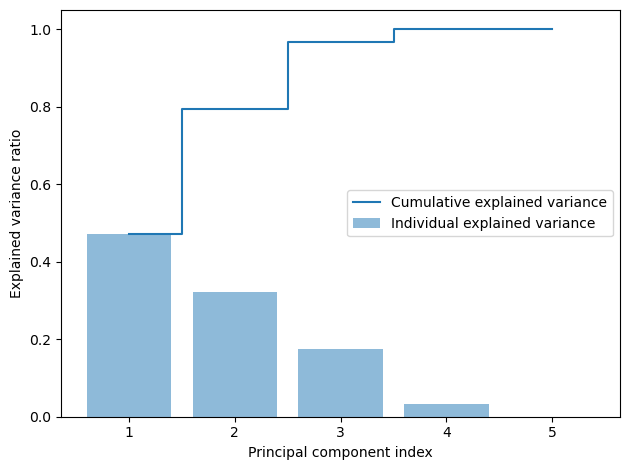

In [71]:
# Evaluation PCA with Explained variance ratio

tot = sum(eigenvalues)
var_exp = [(i / tot) for i in
          sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,len(eigenvalues) + 1), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,len(eigenvalues) + 1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**PCA with Scikit-learn**

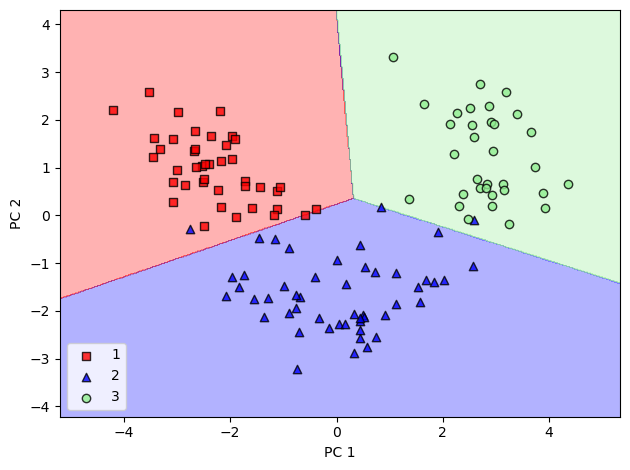

In [5]:
# PCA with Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None)

df.columns = ["class", "Alcohol", "Malicacid", 
              "Ash", "Alcalinity_of_ash", "Magnesium", 
              "Total_phenols", "Flavanoids", 
              "Nonflavanoid_phenols", "Proanthocyanins",
              "Color_intensity", "Hue", 
              "0D280_0D315_of_diluted_wines", "Proline"]

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3,
                    stratify=y, random_state=0)

# 1. Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2. Modeling
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

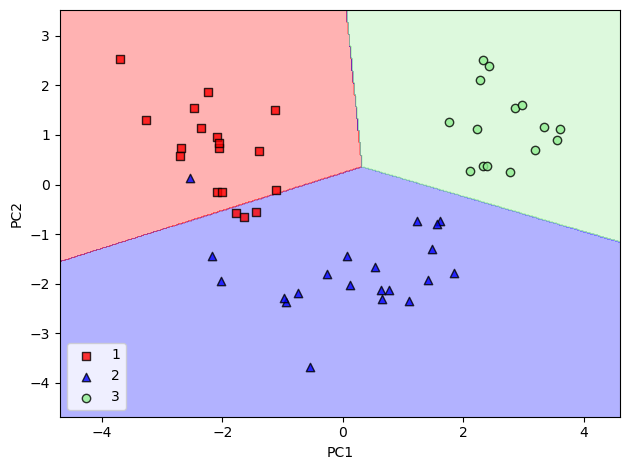

In [6]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [7]:
# Evaluation PCA with Explained variance ratio
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# Linear Discriminant Analysis

1. Standardisasi dataset
2. Menghitung within-class scatter matrix (Sw)
3. Menghitung between-class scatter matrix (Sb)
4. Menghitung eigenvalues dan eigenvectors (Sw^-1 * SB)
5. Pilih top-k eigenvectors ==> Hasilnya adalah transformation matrix
6. Proyeksi data

Calculate mean vectors
MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]
MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]
MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]

Calculate within-class scatter matrix
Scaled within-class scatter matrix: (13, 13)

Calculate between-class scatter matrix
Scaled between-class scatter matrix: (13, 13)

Calculate eigenvalues and eigenvectors
Eigenvalues:
[0.00000000e+00 1.72761522e+02 3.49617809e+02 2.08774988e-14
 2.08774988e-14 2.13441515e-14 1.87248434e-14 2.37717224e-14
 1.39549723e-14 1.39549723e-14 6.24501395e-15 6.24501395e-15
 7.66910546e-16]
Eigenvectors:
[[ 0.7516965  -0.40918668 -0.14808266 -0.3

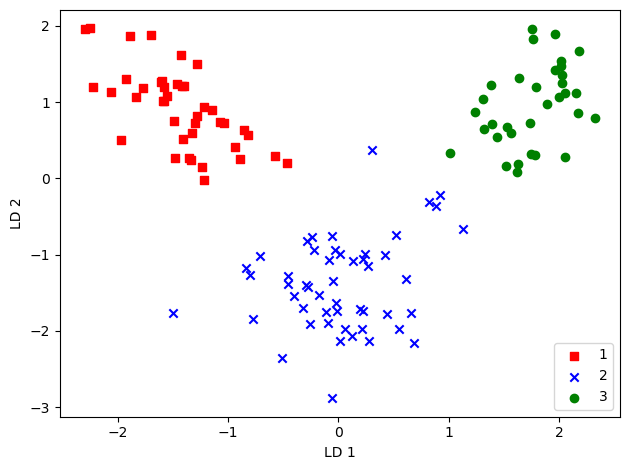

In [69]:
import numpy as np

# Define the data matrix

# print("Define dataset:\n", X)

# 1. Calculate mean vectors
print("Calculate mean vectors")
classes = np.unique(y_train)
mean_vectors = []
for i in range(len(classes)):
    label = classes[i]
    mean = np.mean(X_train_std[y_train == label], axis=0)
    mean_vectors.append(mean)
    print(f'MV {label}: {mean_vectors[i]}')

# Calculate within-class scatter matrix
print("\nCalculate within-class scatter matrix")
d = X_train_std.shape[-1] # Number of features
Sw = np.zeros((d, d))
for label, mv in zip(classes, mean_vectors):
    variable = mean_vectors[0].reshape(1, -1) - X_train_std[y_train == label]
    class_scatter = np.cov(variable.T)
    Sw += class_scatter
    
print(f'Scaled within-class scatter matrix: {Sw.shape[0], Sw.shape[1]}')
# print(Sw)


# Calculate between-class scatter matrix
print("\nCalculate between-class scatter matrix")
mean_overall = np.mean(X_train_std, axis=0)
Sb = np.zeros((d, d))
for label, mv in zip(classes, mean_vectors):
    n = X_train_std[y_train == label].shape[0]
    diff_mean = (mv - mean_overall).reshape(-1, 1)
    Sb += n * diff_mean.dot(diff_mean.T)
print(f'Scaled between-class scatter matrix: {Sb.shape[0], Sb.shape[1]}')
# print(Sb)

# Calculate eigenvalues and eigenvectors
print("\nCalculate eigenvalues and eigenvectors")
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
# for i in range(len(eigenvalues)):
#     print(f"\nEigenvalues {i}:")
#     print(eigenvalues[i])
#     print(f"Eigenvectors {i}:")
#     print(eigenvectors[:,i])

print("Eigenvalues:")
eigenvalues = np.abs(eigenvalues)
print(eigenvalues)
print("Eigenvectors:")
eigenvectors = eigenvectors.real
print(eigenvectors)

# Choose top k eigen vector
k = 2
print(f"\nChoose top {k} eigen vector")
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i])
              for i in range(len(eigenvalues))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

# Projecting data
print("\nProjecting data")
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1] * (-1),
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()    

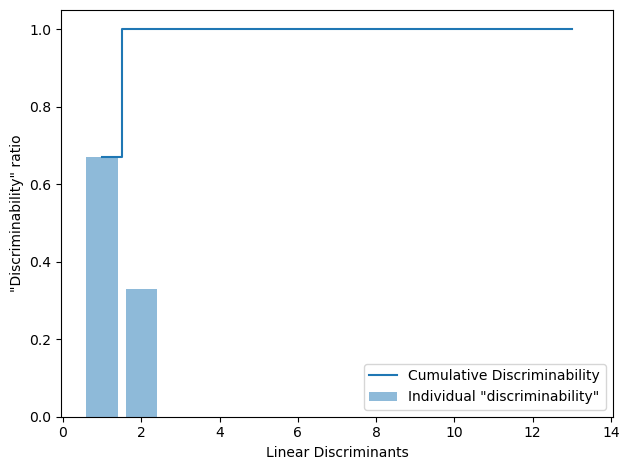

In [62]:
# Evaluation LDA with discriminability (ratio each eigenvalue and its total)

tot = sum(eigenvalues)
var_exp = [(i / tot) for i in
          sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,len(eigenvalues) + 1), var_exp, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1,len(eigenvalues) + 1), cum_var_exp, where='mid',
         label='Cumulative Discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**LDA with Scikit-learn**

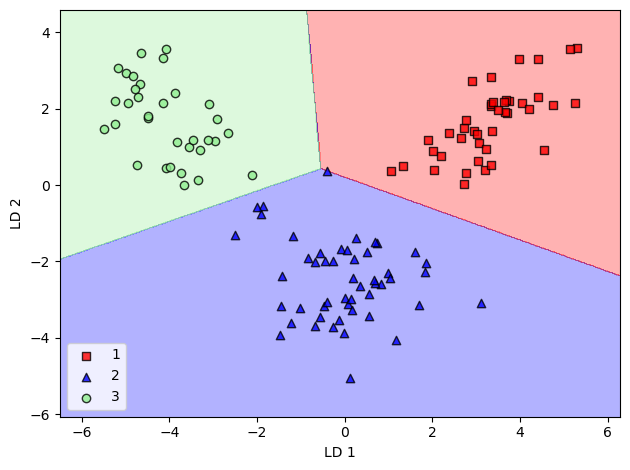

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1,
                        solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

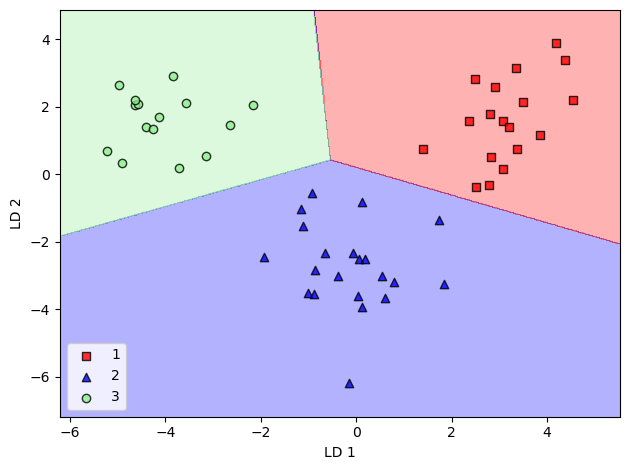

In [73]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Kernel Principal Component Analysis (non-linear mapping)

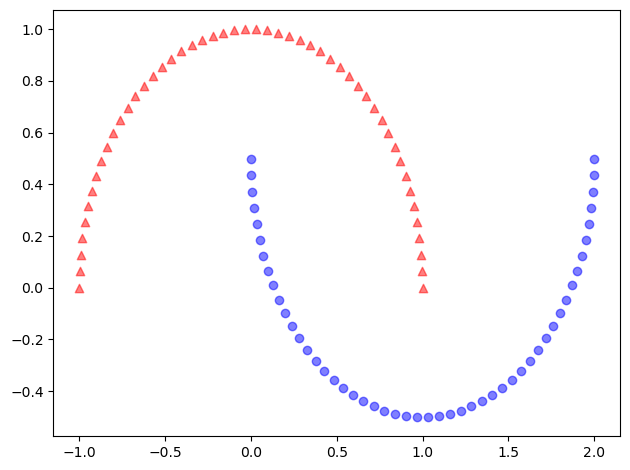

In [74]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

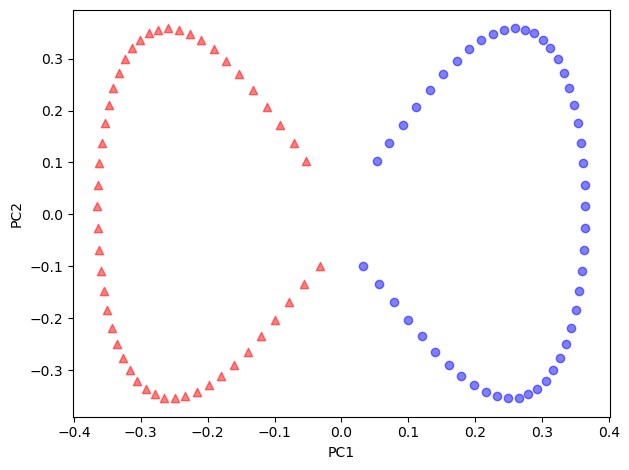

In [77]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,
                        kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()